<a href="https://colab.research.google.com/github/luciarc2004-sketch/TFG-Modelado-capas-iono-y-tropo/blob/main/FebreroIV26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sobre el primer cuaderno añadir coordenadas de las estaciones:
primero sacar vector coordenadas y despues representar.

In [11]:
import requests #request puedo añadir URL al código

try:  #pruebo que no genere error
    url="https://impc.dlr.de/SWE/Total_Electron_Content/TEC_Near_Real-Time/DLR_GNSS_GCG_L4_VTEC-NTCM-SCM_NC_GLOBAL/v2.0.0/2025/240/15/DLR_GNSS_GCG_L4_VTEC-NTCM-SCM_NC_GLOBAL_2025-08-28T15-00-30_2025-08-28T15-05-00_240_D.json"
    # "https://impc.dlr.de/SWE/Total_Electron_Content/TEC_Near_Real-Time/DLR_GNSS_GCG_L4_VTEC-NTCM-SCM_NC_GLOBAL/v2.0.0/latest/DLR_GNSS_GCG_L4_VTEC-NTCM-SCM_NC_GLOBAL_latest_D.json"
    r = requests.get(url)
    #print("OKEY")
except:
    print(
        "Invalid URL or some error occured while making the GET request to the specified URL"
    )
#print( r.text)

import numpy as np
latitudes=np.arange(-90,92.5,2.5)
longitudes=np.arange(-180,185,5)  #creo los vectores(esto realmente no sirve para nada)
#vemos que tenemos 73 valores de ambas variables.

#busco sacar los datos de la URL y meterlos en una matriz
import re
texto=r.text
long_estaciones=re.findall(r'"coordinates":\s*([^properties]+)',texto)



coordenadas_limpias = [   #coordenadas_limpias es una lista
    [float(x) for x in re.findall(r'-?\d+\.?\d*', s.strip("'\""))][:2]
    for s in long_estaciones
    if len(re.findall(r'-?\d+\.?\d*', s.strip("'\""))) >= 2
]


#debe ser de longitud número de esaciones.
coordenadas_estaciones = coordenadas_limpias[0:25897]   ##REALMENTE DEBERIA HABER 400/600

#voy a sacar otra lista con el nombre de las estaciones; despues las filtrare para no repetir nombre de estaciones y por tanto coordenadas
nom_estaciones=re.findall(r'"station":\s*([^,]+)',texto)



j=0
while j<len(nom_estaciones):
  a=nom_estaciones[j]
  posiciones = [i for i, x in enumerate(nom_estaciones) if x == a]
  nom_estaciones  = [
    coord for i, coord in enumerate(nom_estaciones) if i not in posiciones  ]
  coordenadas_estaciones  = [
    coord for i, coord in enumerate(coordenadas_estaciones) if i not in posiciones  ]
  j=j+1
#print(len(nom_estaciones))
#print(len(coordenadas_estaciones))    Sale un total de 549 estaciones, bastante razonable.


Una vez tenemos el vector de coordenadas de las estaciones, las representamos.

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:512: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:512: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:509: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  return super().draw(renderer=renderer, **kwargs)


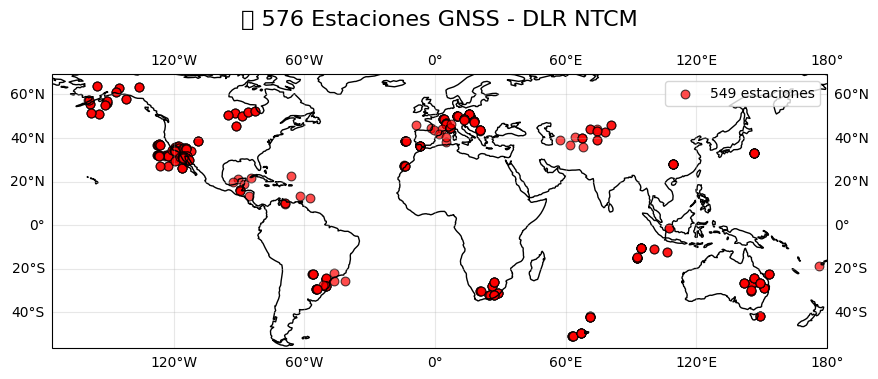

In [16]:
#!pip install cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

lons = np.array([coord[0] for coord in coordenadas_estaciones])
lats = np.array([coord[1] for coord in coordenadas_estaciones])

fig = plt.figure(figsize=(10, 8));
ax = plt.axes(projection=ccrs.PlateCarree());
ax.coastlines();
ax.gridlines(draw_labels=True, alpha=0.3);

# PUNTOS de tus 576 estaciones
scatter = ax.scatter(lons, lats,  c='red', s=40, alpha=0.7, # Transparencia
                    edgecolors='black', # Borde negro
                    linewidth=0.8,    # Grosor borde
                    transform=ccrs.PlateCarree(),
                    label=f'{len(lons)} estaciones');

ax.legend()
plt.title('Estaciones GNSS - DLR NTCM', fontsize=16, pad=20)
plt.show()

